In [1]:
from IPython.display import clear_output 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import torch
from torchvision.utils import make_grid
from torchvision.io import read_image
from torchvision import models, transforms
import sys
import os
from PIL import Image
import torch
# import torch.functional as F
import numpy as np
clear_output()
import glob
from utils.utils import *
from utils.constants import *
from datetime import date

Load dataset from directory

In [3]:
from dataset.glaucomaDataloader import *
cuda = torch.cuda.is_available()
glaucoma_train_dataset = GlaucomaDataset(phase="train", 
                                         mode="mdindex-longtitude",
                                         datalen=100)

glaucoma_test_dataset  = GlaucomaDataset(phase="test", 
                                         datalen=10,
                                         mode="mdindex-longtitude")

batch_size = 16
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
glaucoma_train_loader = torch.utils.data.DataLoader(glaucoma_train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
glaucoma_test_loader = torch.utils.data.DataLoader(glaucoma_test_dataset, batch_size=batch_size, shuffle=True, **kwargs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


Plot some samples of training dataset

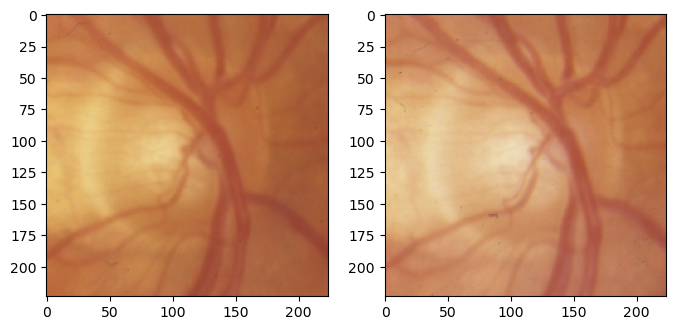

In [11]:
X, y, _ = glaucoma_test_dataset[1]
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(imgtensor2array(X[0], mean=mean, std=std), label= 'Image A')
ax[1].imshow(imgtensor2array(X[1], mean=mean, std=std), label= 'Image B')